<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>

We are now going to give the first steps into exploring the United Nations General Debate Corpus. <span style="color:red">This dataset will be used in Group Assignment I (due date, Monday 4 October, 23:59)</span>. It is expected that you will pose a questions about the dataset, explore it, and combine it with other datasets (e.g., the Happiness Report 2021 that we've been using). 

We will use the *the UN General Debate Corpus (UNGDC)*, which introduces the corpus of texts of UN General Debate statements from 1970 (Session 25) to 2020 (Session 75). More info [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0TJX8Y). Make sure to download the file <code>UNGDC_1970-2020.tar.gz</code> and extract the folder <code>TXT/</code> to the same directory as the current Jupyter notebook. 

Notice that the 76th session of the UN General Assembly - where the 2021 debates will happen - will occur in 14-30 September 2021, precisely during the time you'll be working in Assignment 1. More info [here](https://www.un.org/en/ga/76/meetings/). 

You might find useful to have a dataset with the full name and 3-code description of countries. You can find that date [here](https://unstats.un.org/unsd/methodology/m49/overview/). Download the correspondig CSV file (named 'UNSD — Methodology.csv') and place it into the same folder as this notebook.

We will start by loading the speeches text to a table:

In [ ]:
!pip3 install wordcloud
!pip3 install unicodedata

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "../data/TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), errors="ignore")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,WSM,"Mr. President,\nDistinguished delegates,\nLadi..."
8477,75,2020,YEM,In the name of God the Merciful and the Compas...
8478,75,2020,ZAF,"President of the General Assembly, Secretary-G..."
8479,75,2020,ZMB,"Your excellency Mr. Volkan Bozkir, President o..."
8480,75,2020,ZWE,"Your Excellency, Ambassador Volkan Bozkir, Pre..."


In [6]:
columns = ["Country or Area", "Region Name","Sub-region Name", "ISO-alpha3 Code","Developed / Developing Countries", "Session", "Year", "Speech"]
df_codes = pd.read_csv('../data/UNSD — Methodology.csv', delimiter=";")
df_un_members = df_codes.merge(df_speech)[columns].set_index(["Year", "ISO-alpha3 Code"])
# import to sort the index.
df_un_members.sort_index(level=["Year", "ISO-alpha3 Code"], ascending=[1,1], inplace=True)
df_un_members.head()

,,Country or Area,Region Name,Sub-region Name,Developed / Developing Countries,Session,Speech
Year,ISO-alpha3 Code,,,,,,
1970,DZA,Algeria,Africa,Northern Africa,Developing,25,1. The delegation of Algeria is very pleased ...
1971,DZA,Algeria,Africa,Northern Africa,Developing,26,\n154.\t : It is not only in order to keep up ...
1972,DZA,Algeria,Africa,Northern Africa,Developing,27,"Mr. President, in electing you to preside over..."
1973,DZA,Algeria,Africa,Northern Africa,Developing,28,"ï»¿121.\tMr. President, since a tradition appe..."
1974,DZA,Algeria,Africa,Northern Africa,Developing,29,"Mr. President, it would be ungracious of the r..."


# Number of sessions over the years
Investigating the number of sessions, and participation


https://www.un.org/en/about-us/growth-in-un-membership

In [4]:
df_un_yearly_members = pd.read_csv('../data/un_members_per_year.csv', delimiter=';', index_col=1)
df_un_yearly_members.head()

,Number of members
Year,
1945,51
1946,55
1947,57
1948,58
1949,59


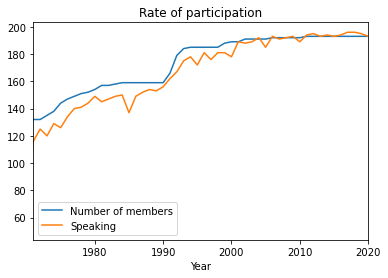

In [5]:
number_of_speeches = df_speech.groupby('Year')['Speech'].count()
number_of_members = df_un_yearly_members['Number of members']

fig, ax = plt.subplots()
ax.plot(number_of_members, label="Number of members")
ax.plot(number_of_speeches, label="Speaking")
ax.set_xlim([1971,2020])
ax.xaxis.label.set_text("Year")
ax.legend()
ax.title.set_text("Rate of participation")

# Subject analysis


In [7]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rikva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Preprocessing
In order to satisfy
- Filter out countries
- Abbreviations
- Stemming
- Lemmexiation

https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e

https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

# Create 
- Further classify

# Resources
https://realpython.com/nltk-nlp-python/#using-named-entity-recognition-ner

In [10]:
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import unicodedata
stop_words = stopwords.words("english")
country_names = np.char.lower(np.unique(df_un_members["Country or Area"].values).astype('U'))
country_names = np.append(country_names, ['soviet', 'united nations', 'us', 'uk'])
def preprocess(words):
    processed_words = []
    for w in words:
        if(not w.isalpha()):
            continue
        w = remove_accents(w)
        processed_words.append(w.lower())
    return processed_words

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_stop_words(words):
    good_words = []
    for word in words:
        if (word not in stop_words):
            good_words.append(word)
    return good_words

def remove_country_name(words):
    contextual_words = []
    for word in words:
        if(not any(word in country_name.split() for country_name in country_names)):
            contextual_words.append(word)
    return contextual_words

def tokenize(speech):
    tokenized = word_tokenize(speech)
    tokenized = preprocess(tokenized)
    tokenized = remove_stop_words(tokenized)
    #tokenized = remove_country_name(tokenized)
    return tokenized

def tokenize_row(row):    
    speech = row['Speech']
    return tokenize(speech)


1009


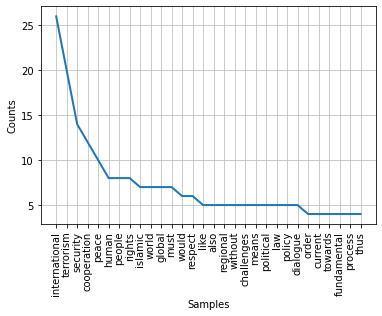

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
text = df_un_members.loc[2002,"UGB"]["Speech"]
unique_words = tokenize(text)
print(len(unique_words))
FreqDist(unique_words).plot(30)


# Attempt 2

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [44]:
df_un_members.head()


Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  
Year ISO-alpha3 Code                                                     
1970 ALB              33: May I first convey to our President the co...  
     ARG              177.\t : It is a fortunate coincidence that pr...  
     AUS              100.\t  It is a pleasure for me to extend to y...  
     AUT              155.\t  May I begin by expressing to Ambassado...  
     BEL              176. No doubt each of us, before coming up to ...

In [98]:
import re

# EDA
#seventies = df_un_members.loc(axis=0)[1970:1980,:]
df_un_members["speech_processed"] = df_un_members["Speech"].map(lambda speech: re.sub('[,\.!?]', '', speech))
df_un_members["speech_processed"] = df_un_members["speech_processed"].map(lambda speech: speech.lower())
df_un_members.head()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-98-81440fd47257>:5: DeprecationWarning: invalid escape sequence \.
  df_un_members["speech_processed"] = df_un_members["Speech"].map(lambda speech: re.sub('[,\.!?]', '', speech))


Country or Area Region Name  \
Year ISO-alpha3 Code                               
1970 ALB                     Albania      Europe   
     ARG                   Argentina    Americas   
     AUS                   Australia     Oceania   
     AUT                     Austria      Europe   
     BEL                     Belgium      Europe   

                                      Sub-region Name  \
Year ISO-alpha3 Code                                    
1970 ALB                              Southern Europe   
     ARG              Latin America and the Caribbean   
     AUS                    Australia and New Zealand   
     AUT                               Western Europe   
     BEL                               Western Europe   

                     Developed / Developing Countries  Session  \
Year ISO-alpha3 Code                                             
1970 ALB                                    Developed       25   
     ARG                                   Developing       25   
     AUS                                    Developed       25   
     AUT                                    Developed       25   
     BEL                                    Developed       25   

                                                                 Speech  \
Year ISO-alpha3 Code                                                      
1970 ALB              33: may i first convey to our president the co...   
     ARG              177\t : it is a fortunate coincidence that pre...   
     AUS              100\t  it is a pleasure for me to extend to yo...   
     AUT              155\t  may i begin by expressing to ambassador...   
     BEL              176 no doubt each of us before coming up to th...   

                                                       speech_processed  
Year ISO-alpha3 Code                                                     
1970 ALB              33: may i first convey to our president the co...  
     ARG              177\t : it is a fortunate coincidence that pre...  
     AUS              100\t  it is a pleasure for me to extend to yo...  
     AUT              155\t  may i begin by expressing to ambassador...  
     BEL              176 no doubt each of us before coming up to th...

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


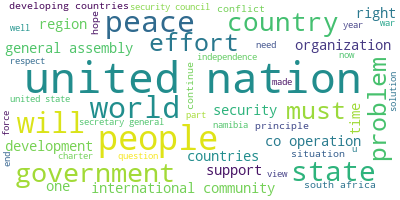

In [102]:
# Wordcloud
from wordcloud import WordCloud

seventies = df_un_members.loc(axis=0)[1980:1990,:]
long_string = ','.join(list(seventies["speech_processed"].values))
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


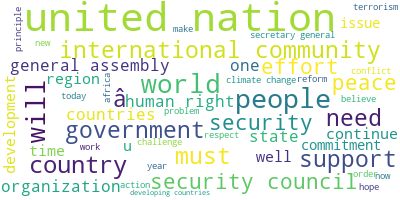

In [103]:
# Wordcloud
from wordcloud import WordCloud

naughties = df_un_members.loc(axis=0)[2000:2010,:]
long_string = ','.join(list(naughties["speech_processed"].values))
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


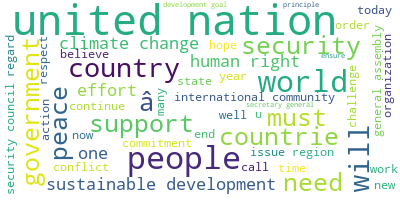

In [104]:
# Wordcloud
from wordcloud import WordCloud

tens = df_un_members.loc(axis=0)[2010:2020,:]
long_string = ','.join(list(tens["speech_processed"].values))
wordcloud = WordCloud(background_color='white', max_words=50, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [110]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['united', 'nations', 'general', 'assembly'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
             
data = seventies.speech_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['may', 'first', 'convey', 'president', 'congratulations', 'albanian', 'delegation', 'election', 'presidency', 'twenty', 'fifth', 'session', 'taking', 'work', 'agenda', 'twenty', 'fifth', 'session', 'held', 'eve', 'twenty', 'fifth', 'anniversary', 'coming', 'force', 'charter', 'peace', 'loving', 'member', 'states']


In [111]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 9), (16, 4), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


In [112]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"international" + 0.008*"peace" + 0.006*"development" + 0.006*"world" '
  '+ 0.006*"must" + 0.005*"countries" + 0.005*"economic" + 0.005*"also" + '
  '0.005*"security" + 0.005*"people"'),
 (1,
  '0.010*"countries" + 0.009*"international" + 0.009*"world" + 0.006*"people" '
  '+ 0.006*"development" + 0.006*"peace" + 0.005*"states" + 0.005*"security" + '
  '0.005*"must" + 0.005*"also"'),
 (2,
  '0.010*"international" + 0.008*"world" + 0.007*"countries" + '
  '0.007*"development" + 0.007*"peace" + 0.006*"security" + 0.005*"states" + '
  '0.005*"rights" + 0.005*"also" + 0.005*"people"'),
 (3,
  '0.011*"countries" + 0.009*"international" + 0.009*"world" + 0.007*"peace" + '
  '0.007*"development" + 0.006*"security" + 0.006*"states" + 0.006*"economic" '
  '+ 0.005*"must" + 0.005*"people"'),
 (4,
  '0.013*"international" + 0.009*"world" + 0.007*"peace" + 0.007*"countries" + '
  '0.007*"security" + 0.006*"people" + 0.006*"states" + 0.005*"economic" + '
  '0.005*"new" + 0.004*"devel

In [113]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        # load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000510  0.001311       1        1  13.650232
1     -0.002917 -0.001776       2        1  12.836828
7      0.000708  0.000150       3        1  12.026668
4     -0.000253  0.000596       4        1  11.136809
9      0.000769 -0.001655       5        1  10.534569
3     -0.002928  0.001504       6        1   9.883332
8      0.000400 -0.002560       7        1   8.747118
6      0.000079  0.001688       8        1   7.456017
5      0.001947 -0.000113       9        1   7.081645
0      0.002704  0.000857      10        1   6.646781, topic_info=               Term           Freq          Total Category  logprob  loglift
918           peace   82288.000000   82288.000000  Default  30.0000  30.0000
832            must   56407.000000   56407.000000  Default  29.0000  29.0000
702   international  123555.000000  123555.000000  Default  28.0000  28.0000
375     development   69427.000000   69427.000000  Default  27.0000  27.0000
311       countries   89046.000000   89046.000000  Default  26.0000  26.0000
...             ...            ...            ...      ...      ...      ...
1129         rights    2251.390895   36047.883178  Topic10  -5.8528  -0.0623
410         efforts    2260.137533   37913.113816  Topic10  -5.8489  -0.1088
1275        support    2077.170872   33140.604332  Topic10  -5.9333  -0.0587
309         council    2016.379353   30929.187506  Topic10  -5.9630  -0.0194
1434          would    1997.111596   38441.075060  Topic10  -5.9726  -0.2464

[968 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
45387      1  0.291152  abdoulkarim
45387      2  0.145576  abdoulkarim
45387      3  0.145576  abdoulkarim
45387      4  0.145576  abdoulkarim
45387      6  0.145576  abdoulkarim
...      ...       ...          ...
50870      3  0.171433     œnigeria
50111      4  0.244987      œreward
50111      5  0.244987      œreward
57039      2  0.495521         œsea
55816      5  0.336940    œsleeping

[3919 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 8, 5, 10, 4, 9, 7, 6, 1])

In [109]:
lda_model[corpus[0]]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.022677416),
 (1, 0.022505002),
 (2, 0.55633795),
 (3, 0.049746606),
 (5, 0.05934607),
 (6, 0.15991157),
 (7, 0.015201485),
 (8, 0.01821818),
 (9, 0.09054155)]